# Sketch Tutorial

Sketch is an AI code writing assistant for pandas users that understands the context of your data, greatly improving the relevance of suggestions. Sketch is usable in seconds and doesn't require adding a plugin to your IDE.

In [24]:
# uncomment and run the cell below to install sketch
#pip install sketch

In [26]:
# import libs

import pandas as pd
import sketch
import matplotlib.pyplot as plt

In [3]:
# read csv

df = pd.read_csv("https://raw.githubusercontent.com/Sven-Bo/datasets/master/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2021,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2021,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2021,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2021,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2021,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Sketch DEMO

In [6]:
# lets ask sketch what the dataset is about.
df.sketch.ask("what is the dataset about?")

In [12]:
# lets ask sketch to give us descriptions of the columns
df.sketch.ask("Can you give me friendly names and single sentence descriptions of each column? (format output as HTML list)")

# Data Cleaning

In [14]:
# shape of the data 
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

    return out

data_shape(df)

The DataFrame has:
	* 1000 rows
	* 17 columns


In [15]:
# info for overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
# descriptive statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## lets check for duplicates

In [17]:

def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")


unique_column_duplicates(df, "Invoice ID")

The column Invoice Id has no duplicates


# EDA

In [13]:
# lets ask sketch what interesting analysis we could do
df.sketch.ask("what interesting analysis could we perform?")

## Univariate analysis

In [19]:
# lets ask sketch to show us how to look at the distribution of customer types.
df.sketch.howto("Plot the distribution of customer types")

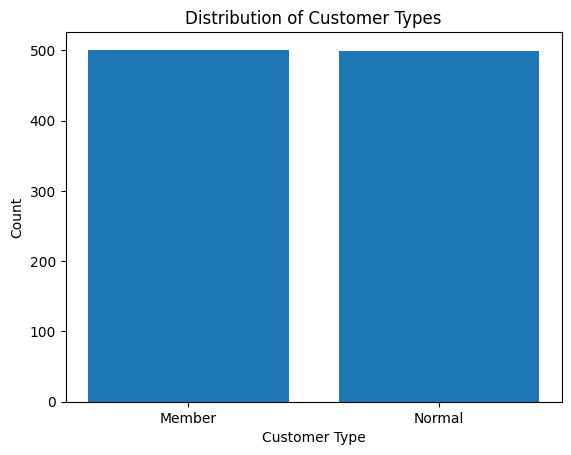

In [27]:
# Plot the distribution of customer types

# Get the counts of each customer type
customer_type_counts = df['Customer_type'].value_counts()

# Plot the distribution of customer types
plt.bar(customer_type_counts.index, customer_type_counts.values)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types')
plt.show()


* The distribution looks fairly equal.
  

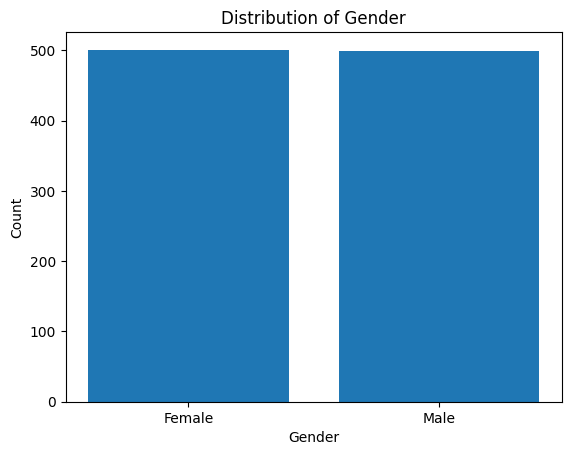

In [30]:
# Plot the distribution of gender

# Get the counts of each customer type
gender_counts = df['Gender'].value_counts()

# Plot the distribution of customer types
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show();

* The distribution looks fairly equal.

In [31]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [32]:
# lets ask sketch to plot distribution of product lines
df.sketch.howto("plot the distribution of Product line")

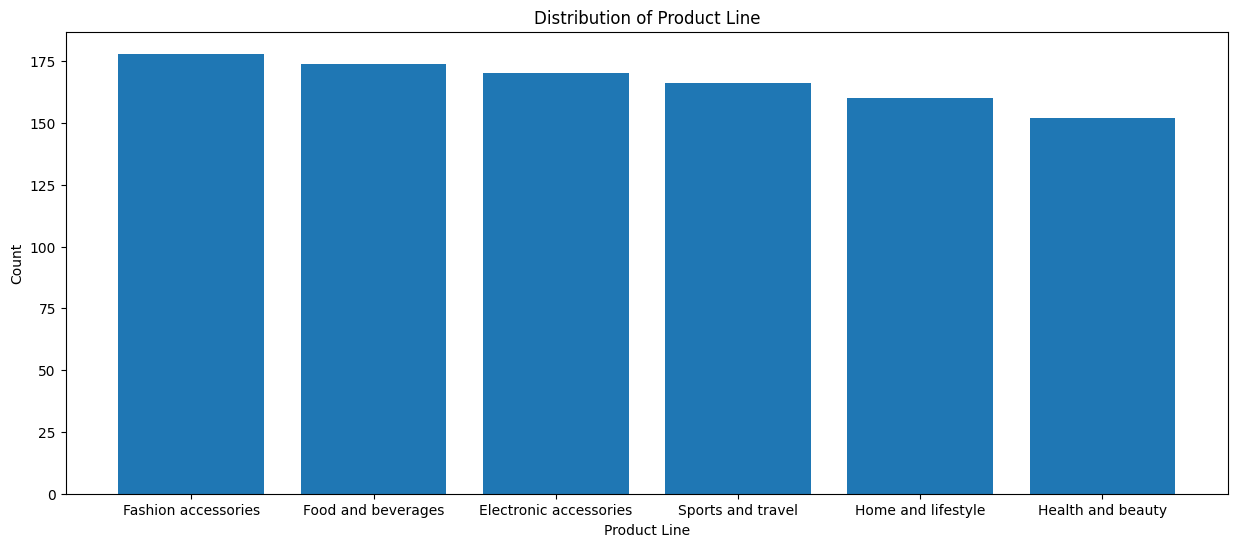

In [35]:

# Plot the distribution of Product line

# Get the counts of each product line
product_line_counts = df['Product line'].value_counts()

# Plot the distribution of product lines
plt.figure(figsize=(15,6))
plt.bar(product_line_counts.index, product_line_counts.values)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Distribution of Product Line')
plt.show()
